# analysis of pp-SRC c.m. momentum simulations

# imports

In [1]:
from notebook_tools import *
%matplotlib inline

Welcome to ROOTaaS 6.06/02

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# read data

runs 20,000-30,000

sims0 = pd.read_csv( '/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs20000to30000_NsigmaT_10_NSigmaZa1_5_NSigmaZa2_8_NMeanZa1_5_NMeanZa2_5_NRand_10_simulationruns_results.csv')

runs 50,000 to 68,746

sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs50000to68746_NsigmaT_15_NSigmaZa1_10_NSigmaZa2_5_NMeanZa1_5_NMeanZa2_5_NRand_10_simulationruns_results.csv')

In [2]:
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs100000to200799_10SigmaT_10SigmaZa1_10SigmaZa2_10MeanZa1_10MeanZa2_10NRand_results.csv')

In [22]:
def draw_PvalWeighting_Fit2Gaussian(var='SigmaX',xlabel='',
                                    bins=50,
                                    legend_loc='bbox',
                                    do_fit_gaussian=True,
                                    x_range = None,
                                    y_range = None,
                                    xtext = None , ytext=None):
    
    weights=[sims.run/sims.run,sims['Pval'+var+'_unweighted'],sims.PvalTotal_unweighted,sims.KSxPval_tot]
    weighting_labels=['generated','$Pval$ weighted','$Pval_{tot}$ weighted','$KS_{tot}$ weighted']
    histograms , bins = plot_1d_withoutandwithweight(sims['gen'+var],
                                                     weights=weights,
                                                     weighting_labels = weighting_labels,
                                                     bins=bins,
                                                     legend_loc=legend_loc,
                                                     fontsize=20,
                                                     xlabel=xlabel,
                                                     x_range=x_range,                                                    
                                                     y_range=y_range);
    do_show_gaussians = [False , True , True , False]
    
    for hw,weight,weighting_label,do_show_gaussian in zip(histograms,weights,weighting_labels,do_show_gaussians):
        mu = np.average(sims['gen'+var] , weights=weight)
        variance = np.average((sims['gen'+var]-mu)**2, weights=weight)
        sigma = np.sqrt(variance)
                                                                           
        if do_fit_gaussian and do_show_gaussian:
            x = np.linspace(bins.min(),bins.max(),100)
            y = mlab.normpdf( x, mu, sigma) # bins
            ynormed = y*(hw.max()/y.max())
            plt.plot(x, ynormed, '--', linewidth=2)
        print weighting_label + ': \n mean=%.3f , stdev=%.3f'%(mu,sigma)
        
    
def draw_PvalWeighting_2d( df , v1 , v2 , bins=40 , weights=None , cmap='Greys' ,
                          xlabel=None,ylabel=None ,
                         figsize=(10,10),title=None):
    fig,ax=plt.subplots(figsize=figsize)
    plt.hist2d(df[v1],df[v2],bins=bins,weights=weights,cmap=cmap);
    plt.colorbar()
    set_axes( ax , xlabel , ylabel )
    ax.set_title(title)
    
    
def draw_all_PvalWeighting_2d(v1='SigmaZa1' , v2='SigmaZa2' ,
                              xlabel='$\\sigma_{z}-a_{1}$',ylabel='$\\sigma_{z}-a_{2}$ [GeV/c]' ,
                              bins=40,
                              figsize=(10,10),
                              weights=None,
                              cmaps=None):
    
    for weight,cmap in zip(weights,cmaps):
        print weight , cmap
        title=weight
        weight=sims[weight] if weight is not None else None
        draw_PvalWeighting_2d( sims , 'gen'+v1 , 'gen'+v2 , bins=bins , weights=weight  , cmap=cmap ,
                              xlabel=xlabel,ylabel=ylabel, figsize=figsize , title=title);


# histograms of generated, and generated+weighted

In [23]:
sims

,Unnamed: 0,KS3dHistPval,KSPval_tot,KStPval_tot,KSxPval_tot,KSzPval_tot,NLostEvents,NentriesSimRun,PmissMax_PmBin0,PmissMax_PmBin1,...,recSigmaZ_unweighted_PmBin1,recSigmaZ_unweighted_PmBin2,recSigmaZ_unweighted_PmBin3,recSigmaZ_unweighted_PmBin4,recSigmaZa1_unweighted,recSigmaZa1_weighted,recSigmaZa2_unweighted,recSigmaZa2_weighted,run,time
0,0,0.919438,3.294442e-73,9.642470e-04,3.772686e-05,2.224360e-72,85969.0,13101,0.45,0.55,...,0.500000,0.500000,0.486908,0.374678,-0.235943,-0.220799,0.616242,0.609036,157600,2016December25
1,1,0.360399,1.546435e-86,5.257399e-02,3.653702e-03,3.837275e-88,82899.0,16171,0.45,0.55,...,0.322204,0.343522,0.317907,0.285359,0.024983,0.035858,0.291080,0.285713,157601,2016December25
2,2,0.387366,5.002072e-83,2.857422e-02,2.775242e-03,1.724143e-84,82719.0,16351,0.45,0.55,...,0.330896,0.330848,0.310123,0.265699,-0.051223,-0.063824,0.334998,0.341441,157602,2016December25
3,3,0.388857,6.178270e-78,1.753281e-02,1.585581e-03,7.462066e-79,81899.0,17171,0.45,0.55,...,0.344771,0.335840,0.319628,0.283200,-0.031774,-0.027857,0.333229,0.331324,157603,2016December25
4,4,0.427912,5.217209e-71,5.804976e-03,3.037013e-03,2.607172e-72,81311.0,17759,0.45,0.55,...,0.365074,0.351097,0.335691,0.273729,-0.092373,-0.098734,0.383206,0.386361,157604,2016December25
5,5,0.447053,3.541716e-67,2.920388e-03,5.711756e-03,1.266453e-68,81048.0,18022,0.45,0.55,...,0.364925,0.360462,0.323751,0.295261,-0.088687,-0.081461,0.388138,0.384554,157605,2016December25
6,6,0.468762,5.055628e-63,2.750276e-02,2.162265e-03,3.714967e-64,81655.0,17415,0.45,0.55,...,0.388241,0.360619,0.329624,0.284030,-0.157708,-0.154753,0.438158,0.436931,157606,2016December25
7,7,0.501759,7.607582e-58,1.806973e-02,1.157872e-03,1.462211e-58,81308.0,17762,0.45,0.55,...,0.396797,0.371697,0.345439,0.287457,-0.174721,-0.172016,0.459510,0.458015,157607,2016December25
8,8,0.507486,5.544940e-53,3.389120e-03,8.836587e-04,1.788028e-53,81481.0,17589,0.45,0.55,...,0.418568,0.388718,0.338838,0.298951,-0.199934,-0.193194,0.486658,0.483753,157608,2016December25
9,9,0.573087,1.450574e-48,4.248639e-03,9.270697e-04,5.538037e-49,81328.0,17742,0.45,0.55,...,0.433610,0.399987,0.362198,0.278928,-0.284810,-0.277789,0.550660,0.547892,157609,2016December25



tab completion not implemented for this context


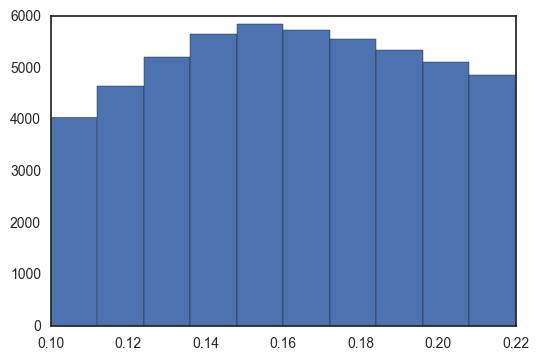

In [36]:
plt.hist(sims.genSigmaX,weights=sims.KS3dHistPval,range=(0.1,0.22));

In [25]:
sims.KSxPval_tot

0        3.772686e-05
1        3.653702e-03
2        2.775242e-03
3        1.585581e-03
4        3.037013e-03
5        5.711756e-03
6        2.162265e-03
7        1.157872e-03
8        8.836587e-04
9        9.270697e-04
10       4.073590e-04
11       2.141066e-03
12       3.784766e-03
13       2.072167e-03
14       8.415158e-04
15       9.855159e-04
16       1.502591e-03
17       1.837446e-03
18       1.910256e-04
19       1.039722e-03
20       1.431274e-03
21       7.579995e-03
22       1.039026e-03
23       5.630787e-04
24       1.135745e-04
25       4.969374e-04
26       1.975438e-03
27       4.710736e-04
28       1.325033e-04
29       1.045096e-03
             ...     
99970    1.787041e-31
99971    2.015401e-03
99972    1.099428e-03
99973    2.180505e-04
99974    4.479005e-06
99975    4.034372e-13
99976    1.780342e-20
99977    1.705307e-27
99978    2.557940e-31
99979    3.206470e-32
99980    1.879586e-33
99981    6.315519e-04
99982    4.025270e-04
99983    1.050511e-06
99984    5

generated: 
 mean=0.160 , stdev=0.031
$Pval$ weighted: 
 mean=0.158 , stdev=0.013
$Pval_{tot}$ weighted: 
 mean=0.155 , stdev=0.015
$KS_{tot}$ weighted: 
 mean=nan , stdev=nan
generated: 
 mean=0.160 , stdev=0.031
$Pval$ weighted: 
 mean=0.163 , stdev=0.016
$Pval_{tot}$ weighted: 
 mean=0.155 , stdev=0.015
$KS_{tot}$ weighted: 
 mean=nan , stdev=nan


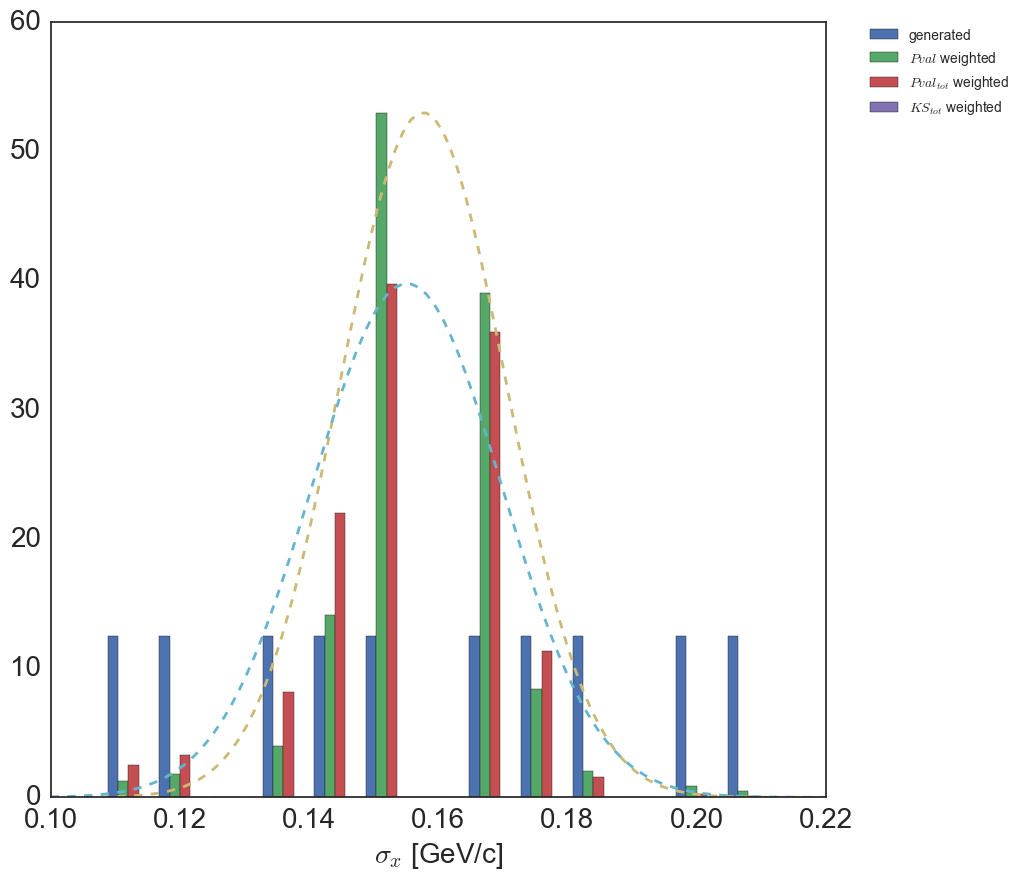

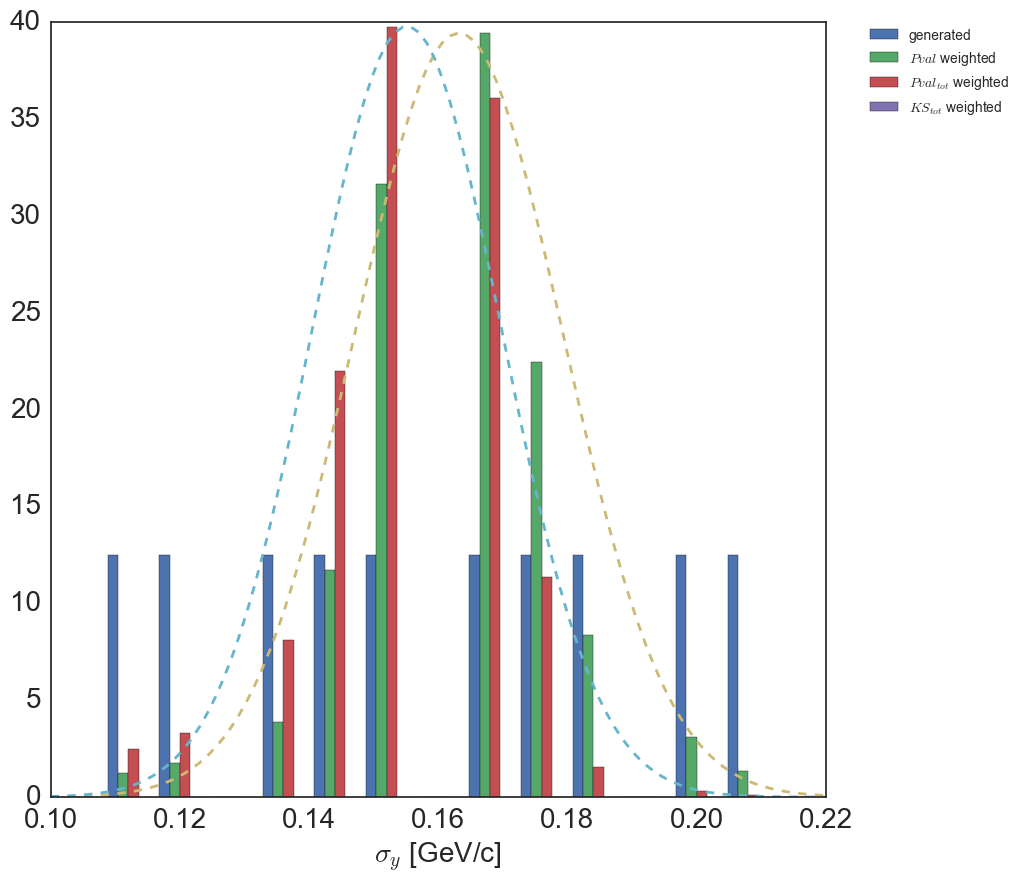

In [26]:
draw_PvalWeighting_Fit2Gaussian(var='SigmaX',xlabel='$\\sigma_{x}$ [GeV/c]',bins=15,x_range=(0.1,0.22))
draw_PvalWeighting_Fit2Gaussian(var='SigmaY',xlabel='$\\sigma_{y}$ [GeV/c]',bins=15,x_range=(0.1,0.22))

In [ ]:
draw_PvalWeighting_Fit2Gaussian(var='SigmaZa1',xlabel='$\\sigma_{z}-a_{1}$',
                                bins=20,do_fit_gaussian=False,x_range=(-0.1,1.4),xtext=0.23)

In [ ]:
draw_PvalWeighting_Fit2Gaussian(var='SigmaZa2',xlabel='$\\sigma_{z}-a_{2}$ [GeV/c]',
                                bins=20,do_fit_gaussian=False)

In [ ]:
draw_PvalWeighting_Fit2Gaussian(var='MeanZa1',xlabel='$\\mu_{z}-a_{1}$',
                                bins=10,x_range=(0.35,0.85),xtext=0.82,do_fit_gaussian=False,legend_loc='none')

In [ ]:
draw_PvalWeighting_Fit2Gaussian(var='MeanZa2',xlabel='$\\mu_{z}-a_{2}$ [GeV/c]',
                                bins=10,legend_loc='upper left',xtext=-0.34,ytext=0.23,do_fit_gaussian=False)

# runs 100,000 to 200,7999

In [ ]:
draw_PvalWeighting_Fit2Gaussian(var='SigmaZa1',xlabel='$\\sigma_{z}-a_{1}$',
                                bins=20,do_fit_gaussian=False,x_range=(-1,2.4),y_range=(0,1.7),xtext=0.23)
draw_PvalWeighting_Fit2Gaussian(var='SigmaZa2',xlabel='$\\sigma_{z}-a_{2}$ [GeV/c]',
                                bins=20,x_range=(-0.3,0.2),do_fit_gaussian=False)

# runs 300,000 to 460,000

In [ ]:
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs300000to460000_NsigmaT_1_NSigmaZa1_20_NSigmaZa2_20_NMeanZa1_20_NMeanZa2_20_NRand_10_simulationruns_results.csv')

sum up Pval for only two variables at a time

In [ ]:
PvalMeanZa1MeanZa2 , PvalSigmaZa1SigmaZa2 , PvalSigmaZa1MeanZa2 , PvalSigmaZa2MeanZa1 , PvalSigmaZa1MeanZa1 , PvalSigmaZa2MeanZa2 = [] , [] , [] , [], [], []
for index, row in sims.iterrows():
    if index%10000==0 : print index
    PvalSigmaZa1SigmaZa2.append(Fisher_combination_Pvals( [ row.PvalSigmaZa1_unweighted , row.PvalSigmaZa2_unweighted ] ) ) 
    PvalMeanZa1MeanZa2.append(Fisher_combination_Pvals( [ row.PvalMeanZa1_unweighted , row.PvalMeanZa2_unweighted ] ) ) 
    
    PvalSigmaZa1MeanZa1.append(Fisher_combination_Pvals( [ row.PvalSigmaZa1_unweighted , row.PvalMeanZa1_unweighted ] ) )    
    PvalSigmaZa1MeanZa2.append(Fisher_combination_Pvals( [ row.PvalSigmaZa1_unweighted , row.PvalMeanZa2_unweighted ] ) )
    
    PvalSigmaZa2MeanZa1.append(Fisher_combination_Pvals( [ row.PvalSigmaZa2_unweighted , row.PvalMeanZa1_unweighted ] ) )
    PvalSigmaZa2MeanZa2.append(Fisher_combination_Pvals( [ row.PvalSigmaZa2_unweighted , row.PvalMeanZa2_unweighted ] ) )
print 'done.'

In [ ]:
sims['PvalSigmaZa1SigmaZa2'] = PvalSigmaZa1SigmaZa2
sims['PvalMeanZa1MeanZa2'] = PvalMeanZa1MeanZa2
sims['PvalSigmaZa1MeanZa1'] = PvalSigmaZa1MeanZa1
sims['PvalSigmaZa1MeanZa2'] = PvalSigmaZa1MeanZa2
sims['PvalSigmaZa2MeanZa1'] = PvalSigmaZa2MeanZa1
sims['PvalSigmaZa2MeanZa2'] = PvalSigmaZa2MeanZa2

In [ ]:
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs300000to460000_1sT_20sZa1_20sZa2_20mZa1_20mZa2_10r_results.csv')

In [ ]:
draw_PvalWeighting_Fit2Gaussian(var='SigmaX',xlabel='$\\sigma_{x}$ [GeV/c]',bins=15)
draw_PvalWeighting_Fit2Gaussian(var='SigmaY',xlabel='$\\sigma_{y}$ [GeV/c]',bins=15)

In [ ]:
draw_PvalWeighting_Fit2Gaussian(var='SigmaZa1',xlabel='$\\sigma_{z}-a_{1}$',
                                bins=20,do_fit_gaussian=False,x_range=(-.1,2.4),y_range=(0,1.7),xtext=0.23)
draw_PvalWeighting_Fit2Gaussian(var='SigmaZa2',xlabel='$\\sigma_{z}-a_{2}$ [GeV/c]',
                                bins=20,x_range=(-0.55,0.55),do_fit_gaussian=False)

In [ ]:
draw_PvalWeighting_Fit2Gaussian(var='MeanZa1',xlabel='$\\mu_{z}-a_{1}$',
                                bins=10,x_range=(0.,1.2),xtext=0.82,do_fit_gaussian=False,legend_loc='none')
draw_PvalWeighting_Fit2Gaussian(var='MeanZa2',xlabel='$\\mu_{z}-a_{2}$',
                                bins=10,x_range=(-0.55,0.55),xtext=0.82,do_fit_gaussian=False,legend_loc='none')

In [ ]:
cmaps = ['Blues' , 'Reds' , 'Greens' , 'Purples']

In [ ]:
weights = [None , 'PvalSigmaZa1SigmaZa2' , 'PvalTotal_unweighted' , 'KStPval_avg' ]
draw_all_PvalWeighting_2d(v1='SigmaZa1' , v2='SigmaZa2', bins=41 ,
                          xlabel='$\\sigma_{z}-a_{1}$',ylabel='$\\sigma_{z}-a_{2}$ [GeV/c]' ,
                          weights=weights,cmaps=cmaps);

In [ ]:
weights = [None , 'PvalMeanZa1MeanZa2' , 'PvalTotal_unweighted' , 'KSPval_tot' ]
draw_all_PvalWeighting_2d(v1='MeanZa1' , v2='MeanZa2', bins=41 ,
                          xlabel='$\\mu_{z}-a_{1}$',ylabel='$\\mu_{z}-a_{2}$ [GeV/c]' ,
                          weights=weights,cmaps=cmaps);

In [ ]:
weights = [None , 'PvalSigmaZa2MeanZa1' , 'PvalTotal_unweighted' , 'KSPval_tot' ]
draw_all_PvalWeighting_2d(v1='MeanZa1' , v2='SigmaZa2', bins=41 ,
                          xlabel='$\\mu_{z}-a_{1}$',ylabel='$\\sigma_{z}-a_{2}$ [GeV/c]' ,
                          weights=weights,cmaps=cmaps);

In [ ]:
weights = [None , 'PvalSigmaZa2MeanZa2' , 'PvalTotal_unweighted' , 'KSPval_tot' ]
draw_all_PvalWeighting_2d(v1='MeanZa2' , v2='SigmaZa2', bins=41 ,
                          xlabel='$\\mu_{z}-a_{2}$',ylabel='$\\sigma_{z}-a_{2}$ [GeV/c]' ,
                          weights=weights,cmaps=cmaps);

In [ ]:
weights = [None , 'PvalSigmaZa1MeanZa1' , 'PvalTotal_unweighted' , 'KSPval_tot' ]
draw_all_PvalWeighting_2d(v1='MeanZa1' , v2='SigmaZa1', bins=41 ,
                          xlabel='$\\mu_{z}-a_{1}$',ylabel='$\\sigma_{z}-a_{1}$ [GeV/c]' ,
                          weights=weights,cmaps=cmaps);

In [ ]:
weights = [None , 'PvalSigmaZa1MeanZa2' , 'PvalTotal_unweighted' , 'KSPval_tot' ]
draw_all_PvalWeighting_2d(v1='MeanZa2' , v2='SigmaZa1', bins=41 ,
                          xlabel='$\\mu_{z}-a_{2}$',ylabel='$\\sigma_{z}-a_{1}$ [GeV/c]' ,
                          weights=weights,cmaps=cmaps);